# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
income_data[1:10]

['Poor', 'Rich', 'Poor', 'Rich', 'Rich', 'Poor', 'Rich', 'Poor', 'Poor']

In [5]:
#z-> N (0,1)
#N(m,n) -> m + n * z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [6]:
data = pd.DataFrame(
{
    "Gender" : gender_data,
    "Economic Status": income_data,
    "Height": height,
    "Weight": weight,
    "Age": age,
    "Income": income
})

In [7]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,159.556548,45.473714,20.314322,8932.291612
1,Female,Poor,138.129711,41.288299,40.171956,16138.353161
2,Female,Rich,205.235305,114.967834,28.547297,23482.089589
3,Male,Poor,135.369846,56.470575,27.751235,22713.595218
4,Female,Rich,160.676750,63.192190,30.861204,19435.755592


## Agrupación de datos

In [8]:
grouped_gender = data.groupby("Gender")

In [9]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   2,   4,   5,   7,   9,  12,  13,  14,
             ...
             481, 484, 485, 488, 489, 490, 495, 496, 497, 498],
            dtype='int64', length=229),
 'Male': Int64Index([  3,   6,   8,  10,  11,  15,  19,  20,  21,  22,
             ...
             474, 482, 483, 486, 487, 491, 492, 493, 494, 499],
            dtype='int64', length=271)}

In [10]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Rich  159.556548   45.473714  20.314322   8932.291612
1    Female            Poor  138.129711   41.288299  40.171956  16138.353161
2    Female            Rich  205.235305  114.967834  28.547297  23482.089589
4    Female            Rich  160.676750   63.192190  30.861204  19435.755592
5    Female            Rich   83.444403   80.300013  26.937929  19721.729799
..      ...             ...         ...         ...        ...           ...
490  Female            Rich  159.915177   79.864594  38.312059  18909.446762
495  Female            Poor  191.272009   66.097267  46.163866  23914.428648
496  Female            Poor  153.196669   21.319684  41.061845  26168.278992
497  Female    Middle Class  184.171229   79.159355  42.845877  17062.144399
498  Female            Rich  112.501413   31.684479  32.948090  14005.143198

[229 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [11]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,159.556548,45.473714,20.314322,8932.291612
1,Female,Poor,138.129711,41.288299,40.171956,16138.353161
2,Female,Rich,205.235305,114.967834,28.547297,23482.089589
4,Female,Rich,160.676750,63.192190,30.861204,19435.755592
5,Female,Rich,83.444403,80.300013,26.937929,19721.729799
...,...,...,...,...,...,...
490,Female,Rich,159.915177,79.864594,38.312059,18909.446762
495,Female,Poor,191.272009,66.097267,46.163866,23914.428648
496,Female,Poor,153.196669,21.319684,41.061845,26168.278992
497,Female,Middle Class,184.171229,79.159355,42.845877,17062.144399


In [12]:
double_group = data.groupby(["Gender", "Economic Status"])

In [13]:
len(double_group)

6

In [14]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
14   Female    Middle Class  251.126181   65.743143  26.463910  15011.777880
24   Female    Middle Class  186.894064   79.018690  29.122535  17715.502099
28   Female    Middle Class  132.668591   93.713547  43.202458  12381.461060
31   Female    Middle Class  162.388945  108.544365  37.756665  10973.663828
32   Female    Middle Class  154.124877   83.458401  42.485554  16536.524140
..      ...             ...         ...         ...        ...           ...
477  Female    Middle Class  190.905959   63.001531  34.152337  20376.331052
481  Female    Middle Class  196.455289   52.828264  45.048912  20663.351476
484  Female    Middle Class  207.059010   85.871317  43.283812  14338.262881
488  Female    Middle Class  130.179483   46.751800  27.469279  13627.710375
497  Female    Middle Class  184.171229   79.159355  42.845877  17062.144399

[70 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [15]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     166.750314  64.248692  30.665121  18929.987234
       Poor             159.432776  63.230880  29.374977  18344.101167
       Rich             160.432081  62.801224  29.630292  18759.469256
Male   Middle Class     166.250921  67.696810  29.629518  17431.700985
       Poor             167.573718  66.967579  31.163756  18354.797361
       Rich             153.944220  66.714286  31.136819  18039.011685

In [16]:
double_group.size()

Gender  Economic Status
Female  Middle Class        70
        Poor                92
        Rich                67
Male    Middle Class        80
        Poor               102
        Rich                89
dtype: int64

In [17]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      70.0  166.750314  29.986842  92.161367  146.301575   
       Poor              92.0  159.432776  32.398987  90.737821  137.937314   
       Rich              67.0  160.432081  28.086266  62.975983  146.294587   
Male   Middle Class      80.0  166.250921  30.442769  88.049084  147.363975   
       Poor             102.0  167.573718  29.530043  82.846135  146.839707   
       Rich              89.0  153.944220  26.193585  73.208828  138.417870   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     168.846804  187.360102  251.126181   70.0  64.248692   
       Poor             161.095819  181.374145  231.703450   92.0  63.230880   
       Rich             163.457540  177.420223  222.814478   67.0  62.801224   
Male   Middle Class     170.189859  182.894303  246.977780   80.0  67.696810   
       Poor             167.592698  189.842184  237.716667  102.0  66.967579   
       Rich             155.738717  171.409888  204.549658   89.0  66.714286   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  42.445436  63.460284   70.0  18929.987234   
       Poor             ...  36.722069  50.930887   92.0  18344.101167   
       Rich             ...  37.018551  69.259333   67.0  18759.469256   
Male   Middle Class     ...  36.677816  56.666696   80.0  17431.700985   
       Poor             ...  38.607933  73.258456  102.0  18354.797361   
       Rich             ...  38.193198  56.615470   89.0  18039.011685   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3410.830039  10973.663828  16850.130281  18717.920605   
       Poor             3539.309809   8821.341392  16426.502106  18224.157774   
       Rich             3404.695280   8932.291612  16430.318481  18771.203370   
Male   Middle Class     3359.694937  10228.230874  15213.879666  16773.869423   
       Poor             3320.541602  12228.572199  16002.405259  17813.617996   
       Rich             3179.093894   9808.502442  15900.633388  17805.115744   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     21176.007431  28251.633765  
       Poor             20492.648707  26168.278992  
       Rich             21275.485716  25424.703978  
Male   Middle Class     19549.291541  26439.787063  
       Poor             20588.035015  29715.974944  
       Rich             20228.701955  26438.138746  

[6 rows x 32 columns]

In [18]:
grouped_income = double_group["Income"]

In [19]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      70.0  18929.987234  3410.830039  10973.663828   
       Poor              92.0  18344.101167  3539.309809   8821.341392   
       Rich              67.0  18759.469256  3404.695280   8932.291612   
Male   Middle Class      80.0  17431.700985  3359.694937  10228.230874   
       Poor             102.0  18354.797361  3320.541602  12228.572199   
       Rich              89.0  18039.011685  3179.093894   9808.502442   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     16850.130281  18717.920605  21176.007431  28251.633765  
       Poor             16426.502106  18224.157774  20492.648707  26168.278992  
       Rich             16430.318481  18771.203370  21275.485716  25424.703978  
Male   Middle Class     15213.879666  16773.869423  19549.291541  26439.787063  
       Poor             16002.405259  17813.617996  20588.035015  29715.974944  
       Rich             15900.633388  17805.115744  20228.701955  26438.138746

In [20]:
double_group.aggregate(
{
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.325099e+06  30.665121  29.986842
       Poor             1.687657e+06  29.374977  32.398987
       Rich             1.256884e+06  29.630292  28.086266
Male   Middle Class     1.394536e+06  29.629518  30.442769
       Poor             1.872189e+06  31.163756  29.530043
       Rich             1.605472e+06  31.136819  26.193585

In [21]:
double_group.aggregate(
{
    "Age": np.mean,
    "Height": lambda h: np.mean(h)/np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     30.665121  5.600933
       Poor             29.374977  4.947883
       Rich             29.630292  5.755229
Male   Middle Class     29.629518  5.495552
       Poor             31.163756  5.702709
       Rich             31.136819  5.910471

In [22]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11672.521978  166.750314  29.986842  4497.408407   
       Poor             14667.815404  159.432776  32.398987  5817.240968   
       Rich             10748.949423  160.432081  28.086266  4207.682016   
Male   Middle Class     13300.073707  166.250921  30.442769  5415.744764   
       Poor             17092.519258  167.573718  29.530043  6830.693066   
       Rich             13701.035554  153.944220  26.193585  5937.571438   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     64.248692  20.834800  2146.558455  30.665121   
       Poor             63.230880  25.098058  2702.497922  29.374977   
       Rich             62.801224  23.703307  1985.229588  29.630292   
Male   Middle Class     67.696810  24.390430  2370.361447  29.629518   
       Poor             66.967579  27.448554  3178.703070  31.163756   
       Rich             66.714286  24.413232  2771.176921  31.136819   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     14.359402  1.325099e+06  18929.987234  3410.830039  
       Poor             10.147880  1.687657e+06  18344.101167  3539.309809  
       Rich             12.578904  1.256884e+06  18759.469256  3404.695280  
Male   Middle Class     11.606565  1.394536e+06  17431.700985  3359.694937  
       Poor             12.364104  1.872189e+06  18354.797361  3320.541602  
       Rich             11.196209  1.605472e+06  18039.011685  3179.093894

In [23]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.600933  3.105986  2.150962  5.590037
       Poor             4.947883  2.533158  2.910553  5.211360
       Rich             5.755229  2.669467  2.373332  5.551467
Male   Middle Class     5.495552  2.793060  2.568930  5.221213
       Poor             5.702709  2.451797  2.532950  5.554949
       Rich             5.910471  2.748193  2.796771  5.706411

## Filtrado de datos

In [24]:
double_group["Age"].filter(lambda x: x.sum()>2400)

1      40.171956
3      27.751235
6      24.515141
8      32.005461
9      25.058547
         ...    
491    25.801500
492    47.764138
494    17.969092
495    46.163866
496    41.061845
Name: Age, Length: 283, dtype: float64

## Transformación de variables

In [25]:
zscore = lambda x:(x - x.mean()/x.std())

In [26]:
z_group = double_group.transform(zscore)

In [27]:
import matplotlib.pyplot as plt

(array([  2.,   8.,  39., 100., 114., 131.,  76.,  23.,   5.,   2.]),
 array([-12.40811867,  -4.09351146,   4.22109575,  12.53570296,
         20.85031017,  29.16491737,  37.47952458,  45.79413179,
         54.108739  ,  62.4233462 ,  70.73795341]),
 <a list of 10 Patch objects>)

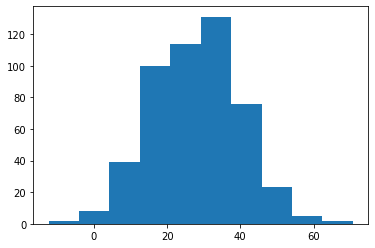

In [28]:
plt.hist(z_group["Age"])

In [29]:
fill_na_mean = lambda x: x.fillna[x.mean()]#Sustituir los espacios en blanco por el promedio

In [30]:
double_group.transform(fill_na_mean)

TypeError: Transform function invalid for data types

## Operaciones diversas muy útiles

In [47]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,192.431479,51.424374,11.670460,22010.217800
1,Male,Rich,178.051261,52.855855,46.649124,12594.968932
2,Male,Poor,117.088606,73.079919,14.318675,18721.077773
3,Female,Rich,96.581390,83.299272,32.886794,18461.820589
4,Female,Poor,102.358237,27.958002,65.102520,20246.224566
17,Male,Middle Class,140.858166,59.571647,22.818153,14291.702701


In [48]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     110.002903  70.047179   9.343196  13067.278655
       Poor             129.284329  88.902912  25.549569  18445.288030
       Rich             174.823576  63.374120  38.441124  19657.957241
Male   Middle Class     167.758574  60.055412  19.334654  18300.133282
       Poor             179.779981  15.162870  37.211815  21771.314102
       Rich             186.722724  59.429457  24.863558  25862.580724

In [49]:
data_sorted = data.sort_values(["Age", "Income"])

In [52]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
110,Female,Middle Class,171.213750,57.152662,-10.252363,18464.008317
174,Male,Rich,125.201794,46.866207,-5.799720,20853.038804
397,Female,Middle Class,174.617451,80.443769,-2.918695,15304.738054
274,Female,Rich,172.728156,82.599339,-0.567184,18768.170566
495,Female,Poor,200.976933,46.728306,-0.562563,22015.878031
416,Female,Middle Class,131.450366,78.710703,-0.358108,26610.306277
158,Male,Rich,156.739934,82.287122,3.060805,14562.820753
387,Male,Rich,169.347006,76.277814,3.105338,14549.384537
480,Male,Rich,167.676114,79.915967,3.555945,14759.701796
488,Female,Poor,179.814770,76.868415,4.376439,18236.458771


## Conjunto de entrenamiento y de testing

* from sklearn.cross_validation import train_test_split ya no existe
* from sklearn.model_selection import train_test_split
* para representar un vectos de variables booleanas se usaba plt.hist(check)
* ahora es plt.hist(check.astype(int))

In [34]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [35]:
len(data)

3333

## Dividir utilizando la distribución normal

In [37]:
a = np.random.randn(len(data))

(array([  6.,  33., 161., 518., 836., 924., 583., 218.,  49.,   5.]),
 array([-3.72243208, -2.98867039, -2.25490871, -1.52114702, -0.78738533,
        -0.05362364,  0.68013805,  1.41389974,  2.14766143,  2.88142312,
         3.61518481]),
 <a list of 10 Patch objects>)

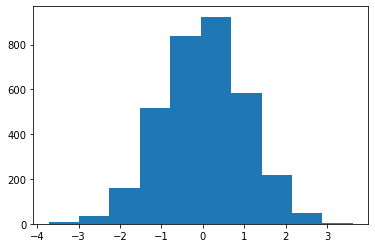

In [38]:
plt.hist(a)

In [39]:
check = (a<0.8)

In [40]:
check

array([ True, False,  True, ...,  True,  True,  True])

(array([ 724.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2609.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

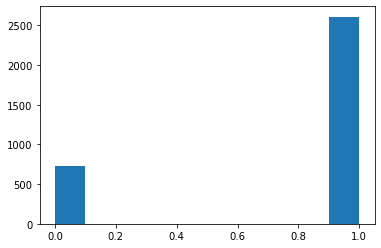

In [42]:
plt.hist(check.astype(int))

In [43]:
training = data[check]
testing =data[~check]

In [44]:
len(training)

2609

In [45]:
len(testing)

724

## Con la libreria sklearn

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train, test = train_test_split(data, test_size = 0.2)

In [49]:
len(train)

2666

In [50]:
len(test)

667

## Usando una funcion de shuffle

In [52]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [53]:
import sklearn

In [55]:
data = sklearn.utils.shuffle(data)

In [57]:
cut_id =int(0.75*len(data))
train_data = data[:cut_id]
text_data = data[cut_id+1:]

In [58]:
len (train_data)

2499

In [60]:
len(text_data)

833